In [29]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt

In [43]:
train = pd.read_csv('data/train.csv')
train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [42]:
a = train.Patient.unique()

In [5]:
y = train["FVC"]
X = train.copy()
X=X.drop(columns = ["FVC", "Patient"])
X['Sex'] = X['Sex'].map(lambda x: 1 if(x == "Male") else 0 )
X['SmokingStatus'] = X['SmokingStatus'].map(lambda x: 1 if(x == "Ex-smoker") else 0 )
X.head()

,Weeks,Percent,Age,Sex,SmokingStatus
0,-4,58.253649,79,1,1
1,5,55.712129,79,1,1
2,7,51.862104,79,1,1
3,9,53.950679,79,1,1
4,11,52.063412,79,1,1


In [6]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.834150178426914

In [7]:
reg.predict(np.array([[1, 80.9, 67, 1, 1]]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3068.32738455])

In [36]:
train

print(X.shape)
print(y.shape)

(1549, 6)
(1549,)


In [37]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X,y)


RandomForestRegressor(random_state=0)

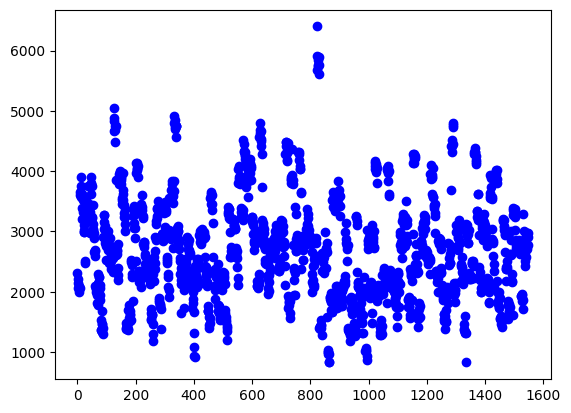

In [38]:
plt.scatter(X["age"], y, color = 'blue') 


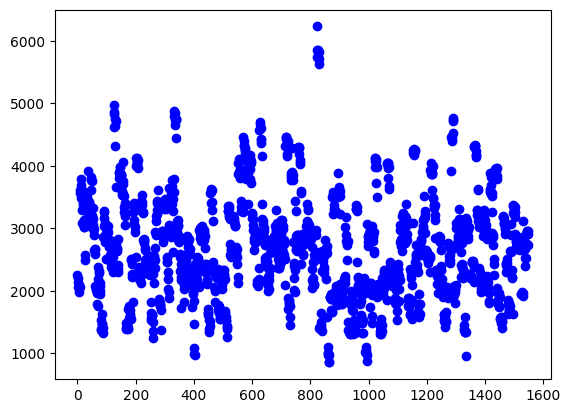

In [39]:
plt.scatter(X["age"], regressor.predict(X), color="blue")

In [40]:
regressor.predict(X)

array([2258.97, 2211.19, 2067.58, ..., 2917.19, 2958.01, 2728.52])

In [41]:
y

0       2315
1       2214
2       2061
3       2144
4       2069
        ... 
1544    2712
1545    2978
1546    2908
1547    2975
1548    2774
Name: FVC, Length: 1549, dtype: int64